<a href="https://colab.research.google.com/github/sameer0013/Data-science/blob/main/Unsupervised/AgglomerativeClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
upload=files.upload()

Saving archive (2).zip to archive (2) (1).zip


In [ ]:
!unzip  /content/archive\ \(2\).zip

Archive:  /content/archive (2).zip
  inflating: Mall_Customers.csv      


In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop("CustomerID",axis=1,inplace=True)

In [ ]:
df.rename(
    columns ={
        "Spending Score (1-100)":"SpendingScore",
        "Annual Income (k$)":"AnnualIncome"
    },inplace=True
)

In [ ]:
df['Genre']=df['Genre'].replace({
    "Male":1,
    "Female":0
})

In [ ]:
df.head()


,Genre,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


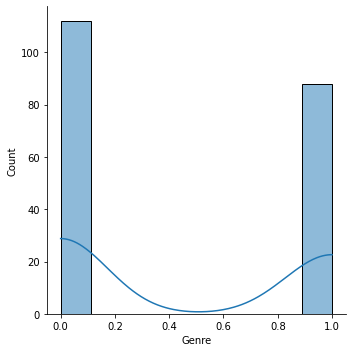

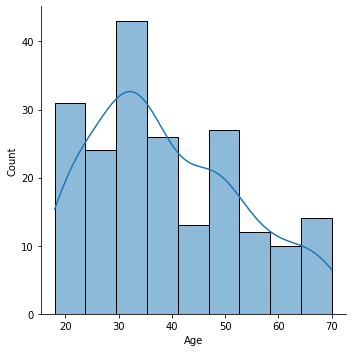

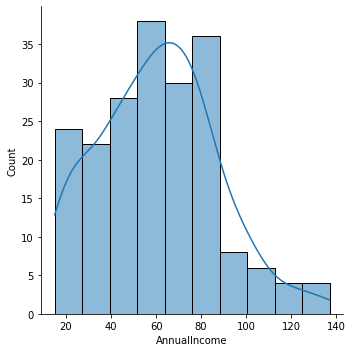

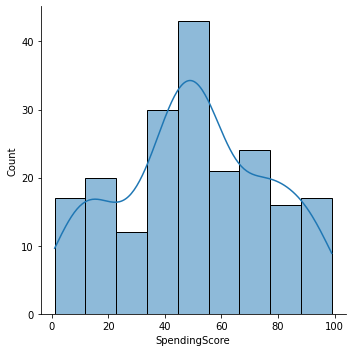

In [ ]:
import seaborn as sns 

for col in df.columns:
  sns.displot(df[col],kde=True)


In [ ]:
from scipy.cluster.hierarchy import linkage

In [ ]:
from scipy.cluster.hierarchy import dendrogram

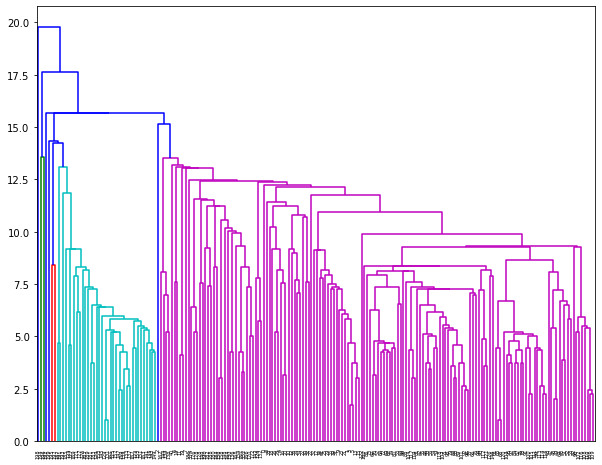

In [ ]:
merge=linkage(df,method="single",metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(merge)
plt.show()

In [ ]:
merge.shape

(199, 4)

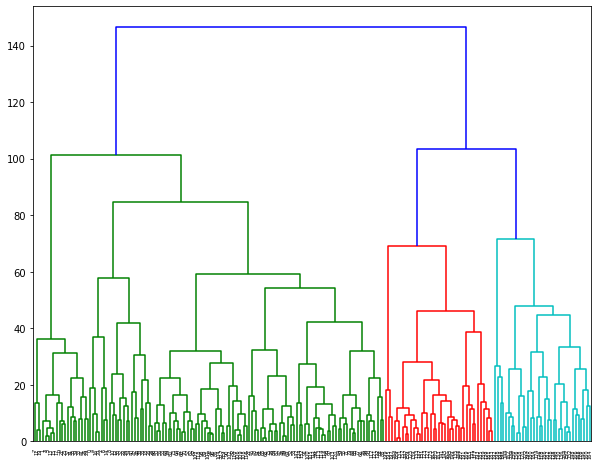

In [ ]:
merge=linkage(df,method="complete",metric='euclidean')

plt.figure(figsize=(10,8))
dendrogram(merge)
plt.show()

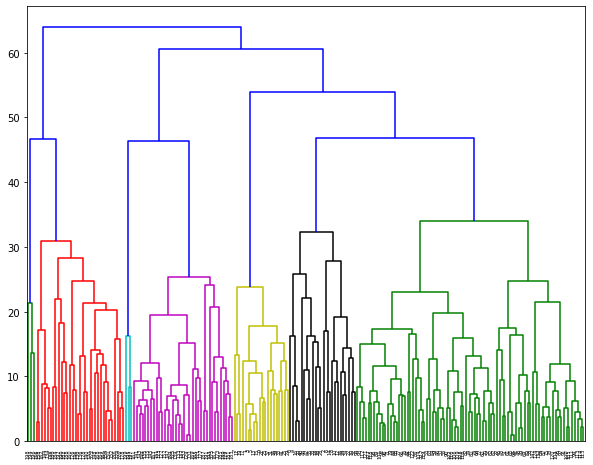

In [ ]:
merge=linkage(df,method="average",metric='euclidean')

plt.figure(figsize=(10,8))
dendrogram(merge)
plt.show()

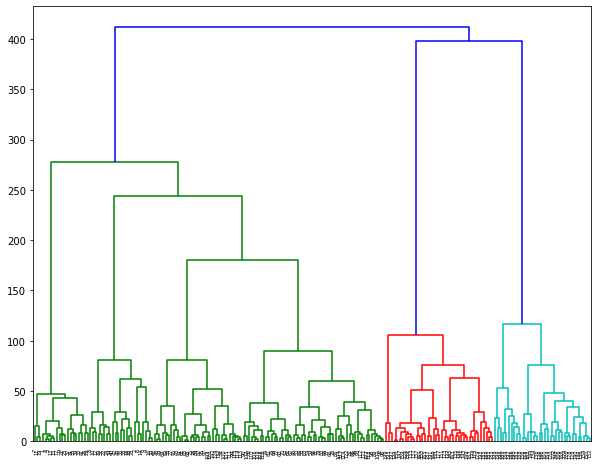

In [ ]:
merge=linkage(df,method="ward",metric='euclidean')

plt.figure(figsize=(10,8))
dendrogram(merge)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merge , n_clusters =3)

In [ ]:
y_pred=y_pred.reshape(-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [ ]:
df.head(1)

,Genre,Age,AnnualIncome,SpendingScore
0,Male,19,15,39


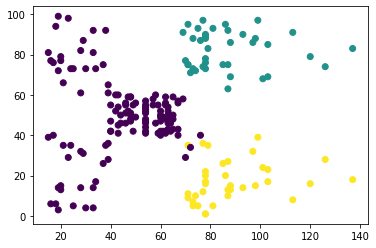

In [ ]:
plt.scatter(df["AnnualIncome"],df['SpendingScore'],c=y_pred)

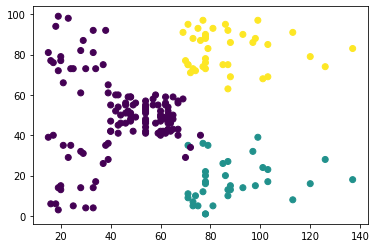

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 3,linkage='ward',affinity='euclidean')

y_pred=ac.fit_predict(df)
plt.scatter(df["AnnualIncome"],df['SpendingScore'],c=y_pred)

In [ ]:
import plotly.express as px
px.scatter_3d(df,x='Age',y='SpendingScore',z='AnnualIncome',color=y_pred)

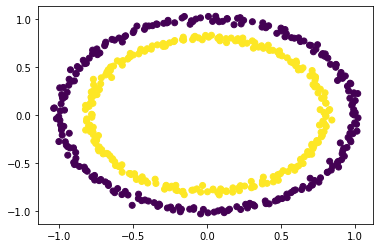

In [ ]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=500,noise=0.02,random_state=40)
plt.scatter(X[:,0],X[:,1],c=y)

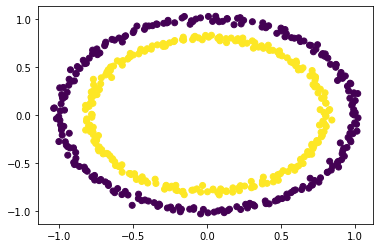

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='single',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

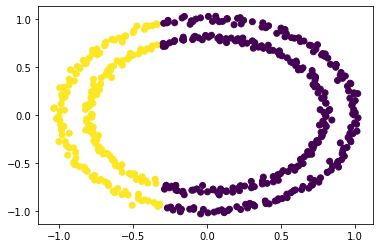

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

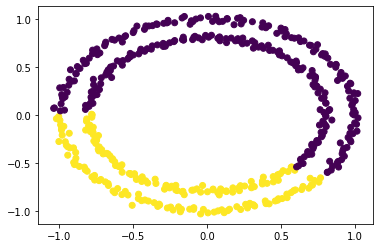

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

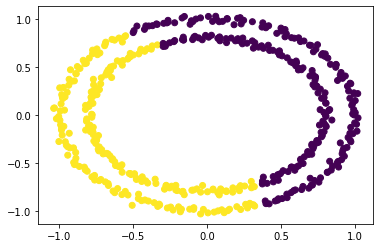

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='average',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

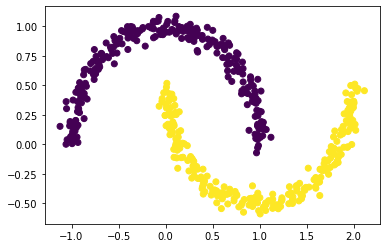

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.05,random_state=40)

plt.scatter(X[:,0],X[:,1],c=y)

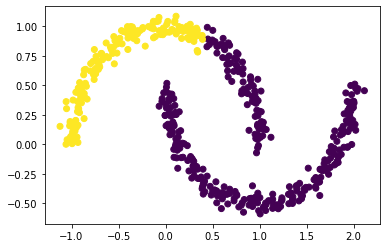

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

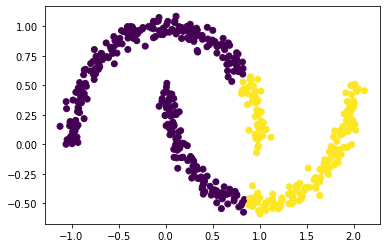

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='average',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

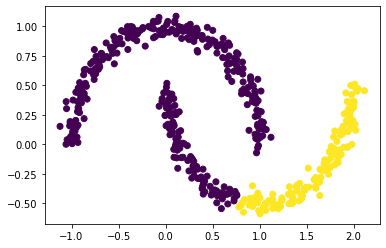

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

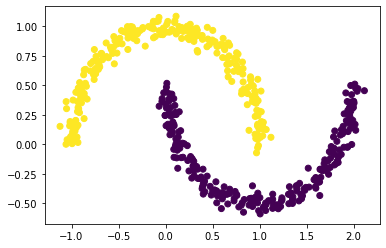

In [ ]:
agg= AgglomerativeClustering(n_clusters=2,linkage='single',affinity='euclidean')
y_pred = agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)